<a href="https://colab.research.google.com/github/1st-award/andong_2021_2_1/blob/main/Python/%ED%95%84%EA%B8%B0%20%EC%82%AC%EB%B3%B8/%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%99%9C%EC%9A%A9_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 구글 드라이브에 저장된 파일을 구글 코랩으로 불러오기

## 구글 드라이브를 연동할 계정 인증하기

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


## 불러올 파일의 경로와 이름 설정


In [ ]:
import numpy as np
import pandas as pd
popu_data =pd.read_excel('/gdrive/My Drive/Python/202104_경상북도연령별인구현황.xlsx')
popu_data

### 인덱스 번호 0, 2, 3행 삭제

In [ ]:
popu_data.drop(index=[0, 2, 3], inplace=True)
popu_data

### 인덱스 번호 0, 2, 3열 삭제

In [ ]:
popu_data.drop(['행정기관코드', '총 거주자수', '연령구간인구수'], axis=1, inplace=True)
popu_data

### '행정기관' 칼럼 내용을 간소화하여 인덱스로 설정

In [ ]:
city_name = []
for c in popu_data['행정기관']:
  city_name.append(c[5:])
del popu_data['행정기관']
popu_data.index = city_name
popu_data

In [ ]:
# 폰트 설치
!apt -qq -y install fonts-nanum
!apt-get install fonts-nanum* -qq

[런타임] - [런타임 다시 시작]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 12
# 마이너스 부호 깨짐 현상 없애기
plt.rcParams['axes.unicode_minus'] = False
fm._rebuild()

지금까지의 코드를 하나의 셀에 정리하기

In [ ]:
import numpy as np
import pandas as pd

popu_data =pd.read_excel('/gdrive/My Drive/Python/202104_경상북도연령별인구현황.xlsx')
popu_data.drop(index=[0, 2, 3], inplace=True)
popu_data.drop(['행정기관코드', '총 거주자수', '연령구간인구수'], axis=1, inplace=True)
city_name = []
for c in popu_data['행정기관']:
  city_name.append(c[5:8])
del popu_data['행정기관']
popu_data.index = city_name
popu_data

## 포항과 안동의 연령별 인구를 가로 막대그래프(항아리형 그래프)로 표시하여 비교하기

In [ ]:
import matplotlib.pyplot as plt
# sub_popu = pd.DataFrame(popu_data.iloc[[0, 3]])
sub_popu = pd.DataFrame(popu_data.loc[['포항시', '안동시']])
sub_popu = sub_popu.T
sub_popu

In [ ]:
pohang, andong = sub_popu['포항시'], sub_popu['안동시']
for i in range(len(sub_popu['포항시'])):
  if type(pohang[i]) == type('abc'):
    pohang[i] = pohang[i].replace(',', '')
    pohang[i] = pd.to_numeric(pohang[i])
for i in range(len(sub_popu['안동시'])):
  if type(andong[i]) == type('abc'):
    andong[i] = andong[i].replace(',', '')
    andong[i] = pd.to_numeric(andong[i])

In [ ]:
import matplotlib.pyplot as plt
plt.barh(range(101), pohang)
plt.barh(range(101), andong)
plt.show()

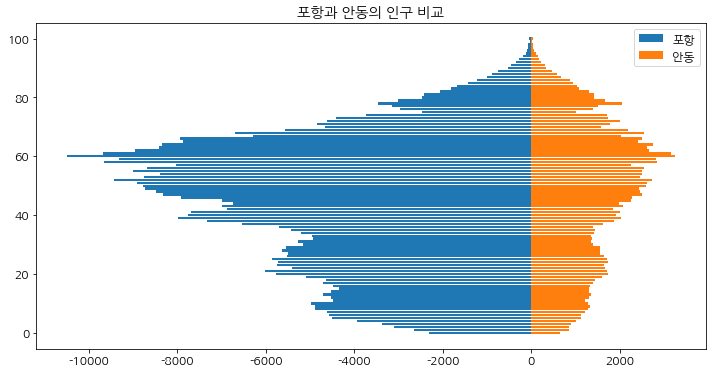

In [ ]:
import matplotlib.pyplot as plt
pohang *= -1
plt.title('포항과 안동의 인구 비교')
plt.barh(range(101), pohang, label='포항')
plt.barh(range(101), andong, label='안동')
plt.legend()
plt.rcParams['figure.figsize'] = (12, 6)
plt.show()